# Compare samplers

In this notebook, we'll compare the different samplers implemented in `tupak`. As of this version, we don't compare the outputs, only how to run them and the timings for their default setup.

## Setup

In [1]:
import numpy as np
import pylab as plt

%matplotlib inline

import peyote

peyote.utils.setup_logger()

time_duration = 1.
sampling_frequency = 4096.

injection_parameters = dict(mass_1=36., mass_2=29., a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0,
                            luminosity_distance=100., iota=0.4, phase=1.3, waveform_approximant='IMRPhenomPv2',
                            reference_frequency=50., ra=1.375, dec=-1.2108, geocent_time=1126259642.413,
                            psi=2.659)

waveform_generator = peyote.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    time_duration=time_duration,
    frequency_domain_source_model=peyote.source.lal_binary_black_hole,
    parameters=injection_parameters)

hf_signal = waveform_generator.frequency_domain_strain()

H1 = peyote.detector.H1
H1.set_data(sampling_frequency=sampling_frequency, duration=time_duration,
            from_power_spectral_density=True)
H1.inject_signal(waveform_polarizations=hf_signal, parameters=injection_parameters)

IFOs = [H1]

likelihood = peyote.likelihood.Likelihood(IFOs, waveform_generator)

09:42 INFO    : Setting H1 data using noise realization from providedpower_spectal_density


## Prior

For this test, we will simply search of the sky position, setting the other parameters to their simulated values.

In [3]:
priors = peyote.prior.parse_floats_to_fixed_priors(injection_parameters)
priors['ra'] = peyote.prior.Uniform(0, 2*np.pi, 'ra')
priors['dec'] = peyote.prior.Uniform(-np.pi/2, np.pi/2, 'dec')

09:43 INFO    : Expected parameter waveform_approximant to be a float or int but was <type 'str'> instead. Will not be converted.


## PyMultinest

09:20 WARNING : No default prior found for unspecified variable waveform_approximant.
09:20 WARNING : This variable will NOT be sampled.
09:20 INFO    : Search parameters:
09:20 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:20 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:20 INFO    :   psi = 2.659
09:20 INFO    :   a_2 = 0
09:20 INFO    :   a_1 = 0
09:20 INFO    :   geocent_time = 1126259642.41
09:20 INFO    :   reference_frequency = 50.0
09:20 INFO    :   phi_jl = 0
09:20 INFO    :   phase = 1.3
09:20 INFO    :   mass_2 = 29.0
09:20 INFO    :   mass_1 = 36.0
09:20 INFO    :   phi_12 = 0
09:20 INFO    :   luminosity_distance = 100.0
09:20 INFO    :   tilt_2 = 0
09:20 INFO    :   iota = 0.4
09:20 INFO    :   tilt_1 = 0
09:20 INFO    : Using sampler Pymultinest with kwargs {'importance_nested_sampling': Fals

Writing priors to outdir/prior.txt


09:20 INFO    : Renaming existing file outdir/pymultinest_result.h5 to outdir/pymultinest_result.h5.old
09:20 INFO    : Saving result to outdir/pymultinest_result.h5
09:20 WARNING : Parameter $\mathrm{RA}$ in chain Chain 0 is not constrained


  analysing data from outdir/pymultinest_pymultinest/.txt


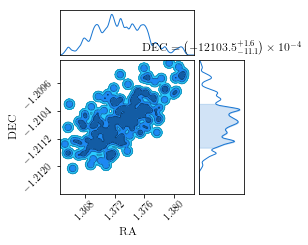

nsamples: 237
noise_logz: -27173.472
logz: -2035.719 +/-  0.260
log_bayes_factor: 25137.753 +/-  0.260

CPU times: user 13.9 s, sys: 288 ms, total: 14.2 s
Wall time: 14 s


In [7]:
%%time 
result = peyote.sampler.run_sampler(
    likelihood, priors=priors, sampler='pymultinest', label='pymultinest',
    npoints=200, verbose=False, resume=False)
fig = result.plot_corner(save=False)
plt.show()
print(result)

# dynesty

09:20 WARNING : No default prior found for unspecified variable waveform_approximant.
09:20 WARNING : This variable will NOT be sampled.
09:20 INFO    : Search parameters:
09:20 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:20 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:20 INFO    :   psi = 2.659
09:20 INFO    :   a_2 = 0
09:20 INFO    :   a_1 = 0
09:20 INFO    :   geocent_time = 1126259642.41
09:20 INFO    :   reference_frequency = 50.0
09:20 INFO    :   phi_jl = 0
09:20 INFO    :   phase = 1.3
09:20 INFO    :   mass_2 = 29.0
09:20 INFO    :   mass_1 = 36.0
09:20 INFO    :   phi_12 = 0
09:20 INFO    :   luminosity_distance = 100.0
09:20 INFO    :   tilt_2 = 0
09:20 INFO    :   iota = 0.4
09:20 INFO    :   tilt_1 = 0
09:20 INFO    : Using sampler Dynesty with kwargs {'dlogz': 0.1, 'verbose': False, 'bound

Writing priors to outdir/prior.txt


iter: 4177+250 | bound: 56 | nc: 1 | ncall: 343548 | eff(%):  1.289 | loglstar:   -inf < 25152.267 <    inf | logz: 25137.941 +/-  0.231 | dlogz:  0.000 >  0.100            09:34 INFO    : Renaming existing file outdir/nestle_result.h5 to outdir/nestle_result.h5.old
09:34 INFO    : Saving result to outdir/nestle_result.h5


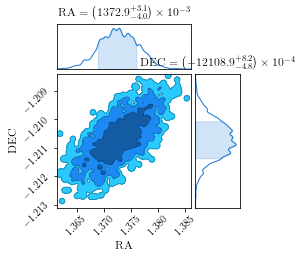

nsamples: 4427
noise_logz: -27173.472
logz: -2035.531 +/-  0.231
log_bayes_factor: 25137.941 +/-  0.231

CPU times: user 13min 51s, sys: 6.27 s, total: 13min 57s
Wall time: 13min 49s


In [8]:
%%time 
result = peyote.sampler.run_sampler(
    likelihood, priors=priors, sampler='dynesty', label='nestle',
    bound='multi', sample='rwalk', npoints=200, walks=100, verbose=False)
fig = result.plot_corner(save=False)
plt.show()
print(result)

# ptemcee

09:44 WARNING : No default prior found for unspecified variable waveform_approximant.
09:44 WARNING : This variable will NOT be sampled.
09:44 INFO    : Search parameters:
09:44 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:44 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:44 INFO    :   psi = 2.659
09:44 INFO    :   a_2 = 0
09:44 INFO    :   a_1 = 0
09:44 INFO    :   geocent_time = 1126259642.41
09:44 INFO    :   reference_frequency = 50.0
09:44 INFO    :   phi_jl = 0
09:44 INFO    :   phase = 1.3
09:44 INFO    :   mass_2 = 29.0
09:44 INFO    :   mass_1 = 36.0
09:44 INFO    :   phi_12 = 0
09:44 INFO    :   luminosity_distance = 100.0
09:44 INFO    :   tilt_2 = 0
09:44 INFO    :   iota = 0.4
09:44 INFO    :   tilt_1 = 0
09:44 INFO    : Using sampler Ptemcee with kwargs {'tqdm': 'tqdm_notebook', 'nwalkers': 1

Writing priors to outdir/prior.txt


A Jupyter Widget

09:45 INFO    : Saving walkers plot to filename
09:45 INFO    : Max autocorr time = 48.6198957968
09:45 INFO    : Tswap frac = [0.0246 0.0246]
09:45 INFO    : Renaming existing file outdir/ptemcee_result.h5 to outdir/ptemcee_result.h5.old
09:45 INFO    : Saving result to outdir/ptemcee_result.h5
09:45 WARNING : Parameter $\mathrm{RA}$ in chain Chain 0 is not constrained
09:45 WARNING : Parameter $\mathrm{DEC}$ in chain Chain 0 is not constrained


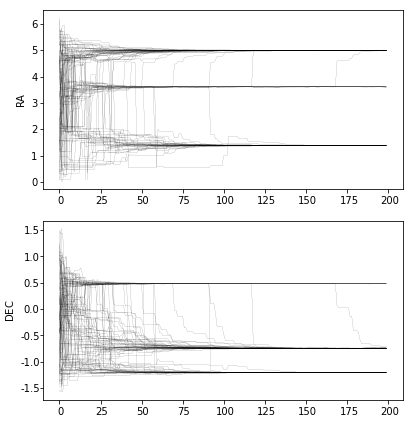

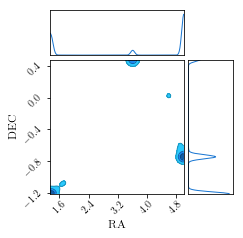

nsamples: 10000
noise_logz: -27810.675
logz:    nan +/-    nan
log_bayes_factor:    nan +/-    nan

CPU times: user 1min 27s, sys: 1.66 s, total: 1min 29s
Wall time: 1min 29s


In [5]:
%%time 
result = peyote.sampler.run_sampler(
    likelihood, priors=priors, sampler='ptemcee', label='ptemcee',
    nwalkers=100, nsteps=200, nburn=100, ntemps=2,
    tqdm='tqdm_notebook')
fig = result.plot_corner(save=False)
plt.show()
print(result)